# Graphlets: Application and Practice

This notebook demonstrates how to use graphlets to analyze the local structure around vertices in a network. We'll practice computing graphlet signatures and interpret what they tell us about vertex positions and roles.

Consider the broader context of this class, which includes a focus on helping you to learn how to do graph data science. An important set of tools for graph data science use data-driven models like neural networks and clustering algorithms. Data-driven models often require feature engineering, where a data engineer designs features that make it easier for the data-driven models to learn or be tuned. 

You can think of a graphlet signature for a vertex as a **vertex feature**. Specifically, a vertex's graphlet signature extracts feature information about local structural properties around the vertex.

## Setup

First, let's import the necessary libraries and utility functions.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from typing import Callable
from graphlet_utilities import (
    find_all_graphlets,
    find_subgraphs_containing_vertex,
    rooted_is_isomorphic,
    show_graphs_in_a_set,
    show_graph
)

# Section 1: Review Graphlets and Display All Possible Types

A **graphlet** is a small induced subgraph of size $k$ (typically 2-5 nodes) where we designate one node as the **root**. The root allows us to distinguish between different rooted isomorphism classes.

Graphlets are useful because they capture the **local structure** around a node—how that node is positioned relative to its neighbors. By counting the number of times a node appears as the root in each graphlet type, we can create a **graphlet signature vector** that characterizes the node's role in the network.

Let's examine all possible graphlets for different sizes:

### Two-Node Graphlets

With just two nodes, there is only **one possible graphlet**: an edge connecting the root node to another node.

Number of 2-node graphlets: 1


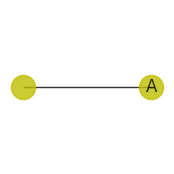

In [2]:
two_node_graphlets = find_all_graphlets(['A', 'B'], 'A')
print(f"Number of 2-node graphlets: {len(two_node_graphlets)}")
labels = {'A': 'A'}
show_graphs_in_a_set(two_node_graphlets, labels)

### Three-Node Graphlets

With three nodes, we can have different configurations depending on how many edges exist. The root node can be:
- Connected to both other nodes (with or without an edge between them)
- Connected to only one other node
- Isolated

This gives us **4 distinct three-node graphlets**.

Number of 3-node graphlets: 3


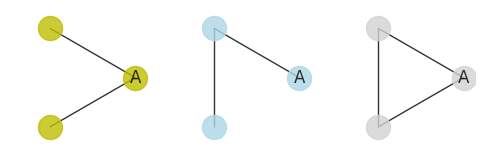

In [3]:
three_node_graphlets = find_all_graphlets(['A', 'B', 'C'], 'A')
print(f"Number of 3-node graphlets: {len(three_node_graphlets)}")
labels = {'A': 'A'}
show_graphs_in_a_set(three_node_graphlets, labels)

### Four-Node Graphlets

Four-node graphlets are where the real diversity emerges. The number of possible configurations grows significantly as we vary:
- How many neighbors the root is connected to
- How those neighbors are connected to each other

This results in **15 distinct four-node graphlets**.

Number of 4-node graphlets: 11


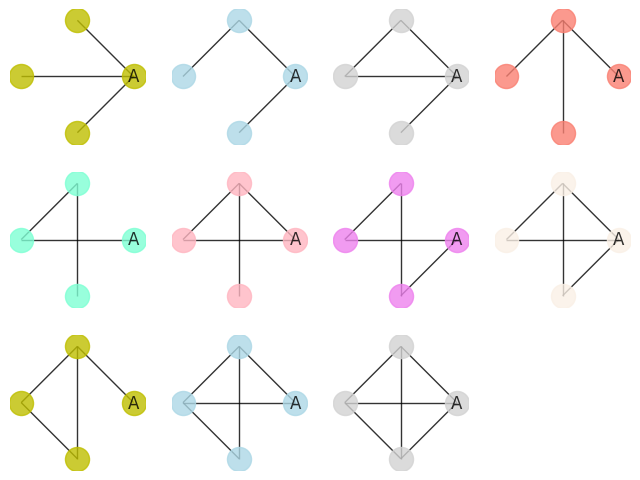

In [4]:
four_node_graphlets = find_all_graphlets(['A', 'B', 'C', 'D'], 'A')
print(f"Number of 4-node graphlets: {len(four_node_graphlets)}")
labels = {'A': 'A'}
show_graphs_in_a_set(four_node_graphlets, labels)

---

# Section 2: Counting Graphlet Occurrences in an Example Graph

Now we'll demonstrate how to count the occurrences of each graphlet type around a specific node in a real network.

First, let's create our example graph:

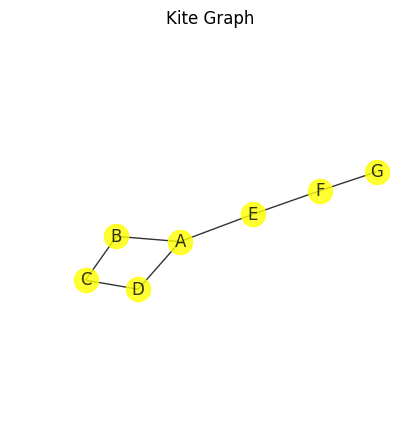

In [5]:
# Create the kite graph
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'), ('E', 'F'), ('F', 'G'), ('A', 'E')])

labels = {vertex: vertex for vertex in G.nodes()}
show_graph(G,
           title='Kite Graph',
           labels=labels,
           layout=nx.spring_layout,
           size=4,
           node_color='yellow')

## Subsection 2.1: Two-Node Graphlets Involving Vertex A

We'll count all two-node subgraphs that contain vertex `A`. Since there's only one type of two-node graphlet, we just need to count how many neighbors `A` has.

Number of 2-node subgraphs containing vertex A: 3

These are:


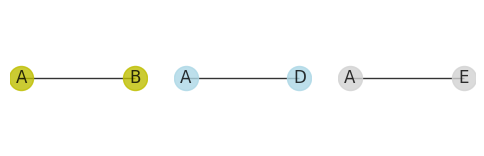

In [6]:
two_node_subgraphs = find_subgraphs_containing_vertex(G, 2, 'A')
print(f"Number of 2-node subgraphs containing vertex A: {len(two_node_subgraphs)}")
print(f"\nThese are:")

labels = {node: node for node in G.nodes()}
show_graphs_in_a_set(two_node_subgraphs, labels)

## Subsection 2.2: Three-Node Graphlets of Each Type for Vertex A

Now we'll count how many three-node subgraphs containing `A` match each of the four possible three-node graphlet types.

In [7]:
def find_subgraphs(graphlets, subgraphs, root):
    node_counts = {}
    graphlet_index = 0
    for graphlet in graphlets:
        # Find all subgraphs that match this graphlet type
        matching_subgraphs = []
        for H in subgraphs:
            if rooted_is_isomorphic(H, graphlet, root):
                matching_subgraphs.append(H)
        
        node_counts[graphlet_index] = len(matching_subgraphs)
        print(f"Graphlet type {graphlet_index}: {len(matching_subgraphs)} occurrences")
        
        # Display the graphlet type
        show_graph(graphlet,
                title=f'Graphlet Type {graphlet_index}\nhas {len(matching_subgraphs)} occurrences',
                labels={root: root})
        
        # Display matching subgraphs if any
        if len(matching_subgraphs) > 0:
            show_graphs_in_a_set(matching_subgraphs, labels)
        
        graphlet_index += 1

    print(f"\n3-node graphlet counts for vertex A: {list(node_counts.values())}")
    return node_counts
    

Total number of 3-node subgraphs containing vertex A: 6

Graphlet type 0: 3 occurrences
Graphlet type 1: 3 occurrences
Graphlet type 2: 0 occurrences

3-node graphlet counts for vertex A: [3, 3, 0]


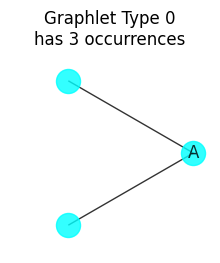

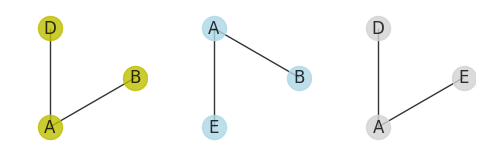

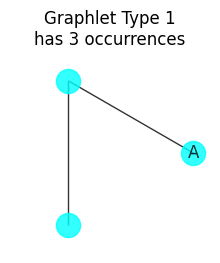

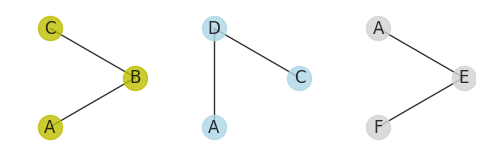

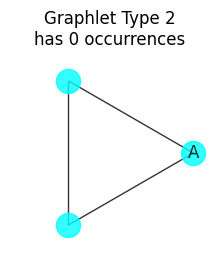

In [8]:
three_node_subgraphs = find_subgraphs_containing_vertex(G, 3, 'A')
print(f"Total number of 3-node subgraphs containing vertex A: {len(three_node_subgraphs)}\n")

three_node_counts = find_subgraphs(three_node_graphlets, three_node_subgraphs, 'A')

## Subsection 2.3: Four-Node Graphlets of Each Type for Vertex A

Finally, we'll count four-node graphlet occurrences. This is where we see significant variation in how `A` is embedded in the network.

Total number of 4-node subgraphs containing vertex A: 7

Graphlet type 0: 1 occurrences
Graphlet type 1: 4 occurrences
Graphlet type 2: 0 occurrences
Graphlet type 3: 0 occurrences
Graphlet type 4: 1 occurrences
Graphlet type 5: 0 occurrences
Graphlet type 6: 1 occurrences
Graphlet type 7: 0 occurrences
Graphlet type 8: 0 occurrences
Graphlet type 9: 0 occurrences
Graphlet type 10: 0 occurrences

3-node graphlet counts for vertex A: [1, 4, 0, 0, 1, 0, 1, 0, 0, 0, 0]


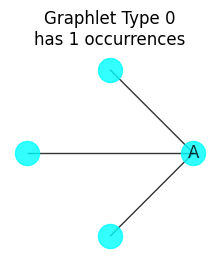

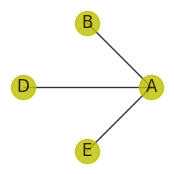

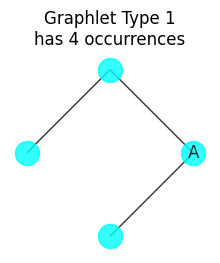

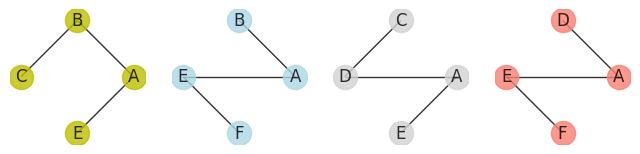

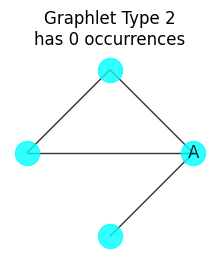

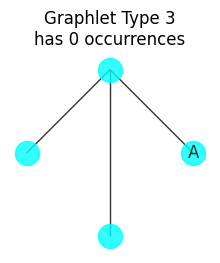

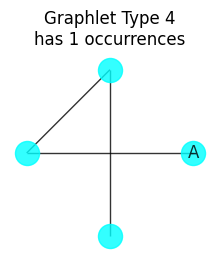

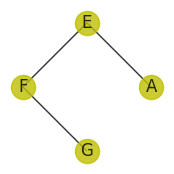

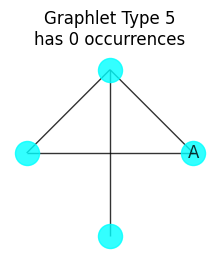

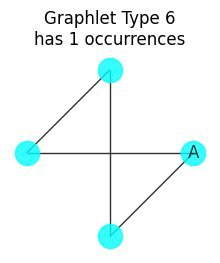

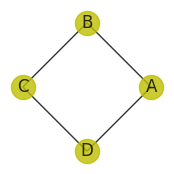

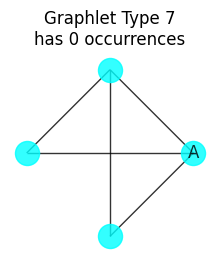

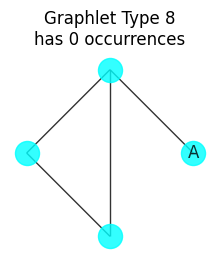

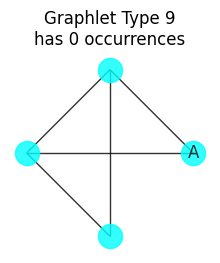

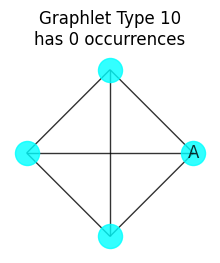

In [9]:
four_node_subgraphs = find_subgraphs_containing_vertex(G, 4, 'A')
print(f"Total number of 4-node subgraphs containing vertex A: {len(four_node_subgraphs)}\n")

root = 'A'

four_node_counts = find_subgraphs(four_node_graphlets, four_node_subgraphs, root)


## Graphlet Signature Vector for Vertex A

Combining all the counts, we create the **graphlet signature vector** for vertex `A`:

In [10]:
# Combine all counts: 1 two-node type + 4 three-node types + 15 four-node types
signature_vector = (
    [len(two_node_subgraphs)] +  # 1 type of 2-node graphlet
    list(three_node_counts.values()) +  # 4 types of 3-node graphlets
    list(four_node_counts.values())  # 15 types of 4-node graphlets
)

print("Graphlet Signature Vector for Vertex A:")
print(signature_vector)
print(f"\nTotal graphlet occurrences: {sum(signature_vector)}")

Graphlet Signature Vector for Vertex A:
[3, 3, 3, 0, 1, 4, 0, 0, 1, 0, 1, 0, 0, 0, 0]

Total graphlet occurrences: 16


---

# Section 3: Student Practice Problem - Butterfly Graph

Now it's your turn! Below is the **butterfly graph**—a graph consisting of two triangles sharing a single vertex (the center vertex M).

Your task: Compute the graphlet signature vector for three nodes in this graph.

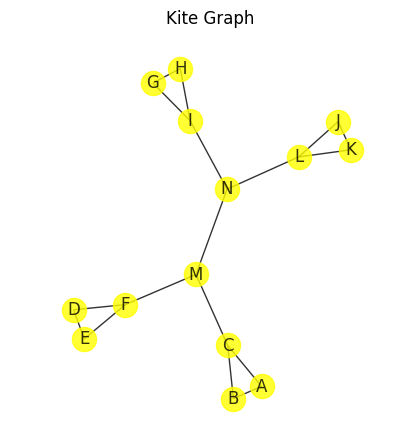

In [11]:
G = nx.Graph()
G.add_edges_from([('A','B'),('B','C'),('C','A'),
                  ('D','E'),('E','F'),('F','D'),
                  ('G','H'),('H','I'),('I','G'),
                  ('J','K'),('K','L'),('L','J'),
                  ('C','M'),('F','M'),('N','L'),
                  ('N','I'),('M','N')])

labels = {vertex: vertex for vertex in G.nodes()}
show_graph(G,
           title='Kite Graph',
           labels=labels,
           layout=nx.spring_layout,
           size=4,
           node_color='yellow')

In [12]:
# Clustering Coefficient for target node
node = 'M'

print(f"Average Clustering Coefficient for the graph: {nx.average_clustering(G)}")
print(f"Clustering Coefficient for node {node}: {nx.clustering(G, node)}\n")


Average Clustering Coefficient for the graph: 0.6666666666666667
Clustering Coefficient for node M: 0



Total number of 2-node subgraphs containing vertex M: 3
Total number of 3-node subgraphs containing vertex M: 9
Total number of 4-node subgraphs containing vertex M: 20


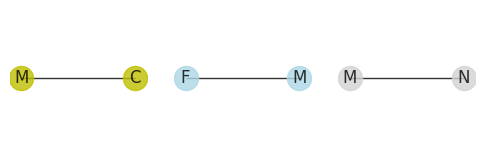

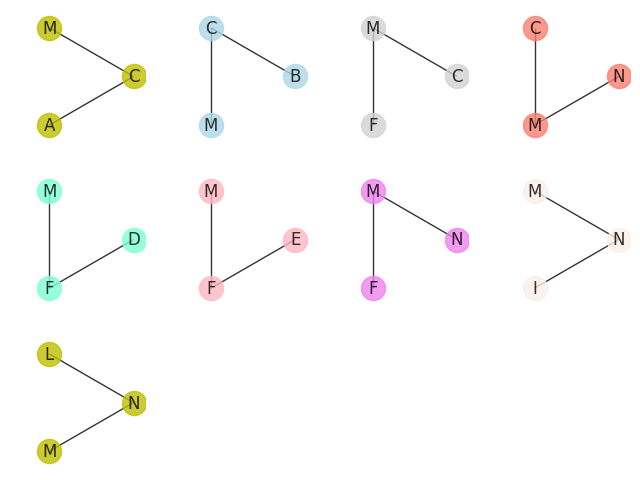

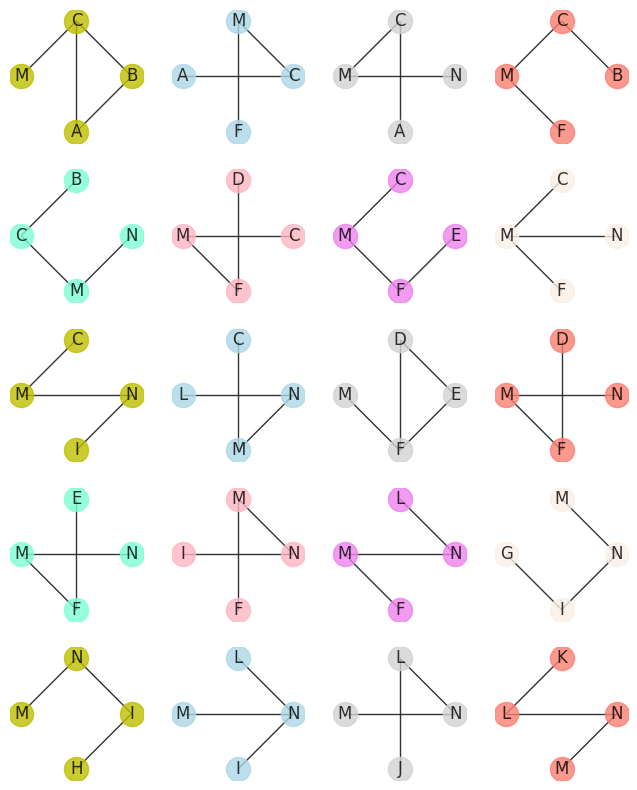

In [13]:
# Graphlet Signature Vector for target node
two_node_subgraphs = find_subgraphs_containing_vertex(G, 2, node)
print(f"Total number of 2-node subgraphs containing vertex {node}: {len(two_node_subgraphs)}")
show_graphs_in_a_set(two_node_subgraphs, labels)

three_node_subgraphs = find_subgraphs_containing_vertex(G, 3, node)
print(f"Total number of 3-node subgraphs containing vertex {node}: {len(three_node_subgraphs)}")
show_graphs_in_a_set(three_node_subgraphs, labels)

four_node_subgraphs = find_subgraphs_containing_vertex(G, 4, node)
print(f"Total number of 4-node subgraphs containing vertex {node}: {len(four_node_subgraphs)}")
show_graphs_in_a_set(four_node_subgraphs, labels)

## Homework Questions


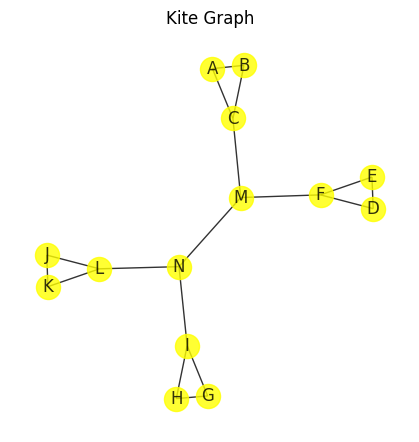

In [28]:
show_graph(G,
           title='Kite Graph',
           labels=labels,
           layout=nx.spring_layout,
           size=4,
           node_color='yellow')

Graphlet type 0: 2 occurrences

3-node graphlet counts for vertex A: [2]


{0: 2}

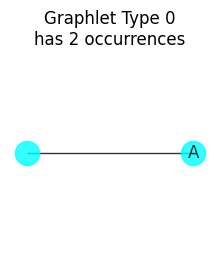

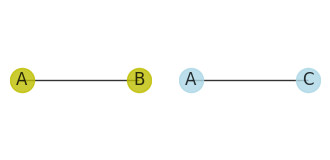

In [15]:
# How many two node graphlets (type 0) are there rooted at vertex A?
two_node_subgraphs = find_subgraphs_containing_vertex(G, 2, 'A')
find_subgraphs(two_node_graphlets, two_node_subgraphs, 'A')

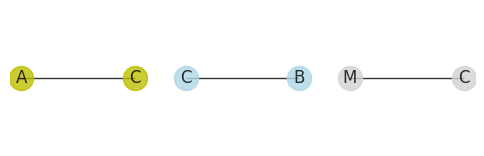

In [16]:
# How many two node graphlets (type 0) are there rooted at vertex C?
two_node_subgraphs = find_subgraphs_containing_vertex(G, 2, 'C')
show_graphs_in_a_set(two_node_subgraphs, labels)

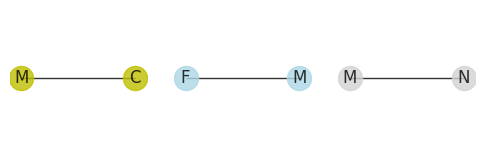

In [17]:
# How many two node graphlets (type 0) are there rooted at vertex M?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 2, 'M'), labels)

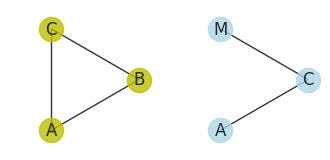

In [30]:
# How many three node graphlets of type 1 are there rooted at vertex A?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 3, 'A'), labels)

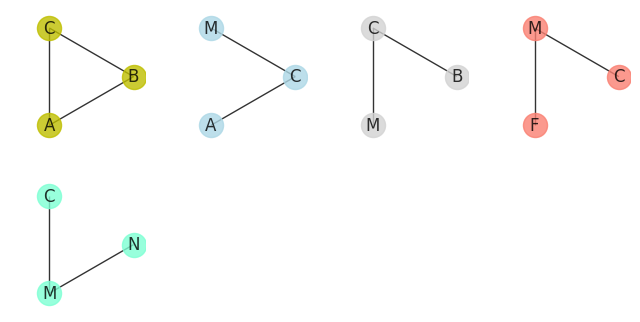

In [31]:
# How many three node graphlets of type 1 are there rooted at vertex C?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 3, 'C'), labels)

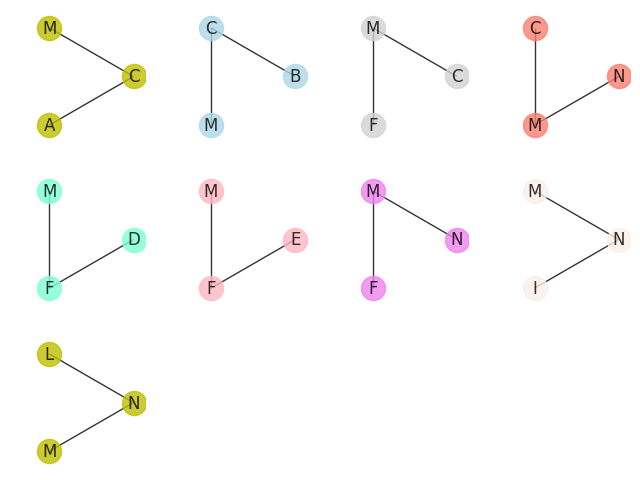

In [32]:
# How many three node graphlets of type 1 are there rooted at vertex M?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 3, 'M'), labels)

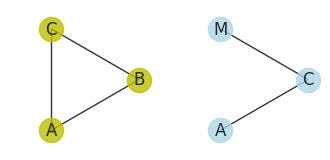

In [33]:
# How many three node graphlets of type 2 are there rooted at vertex A?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 3, 'A'), labels)

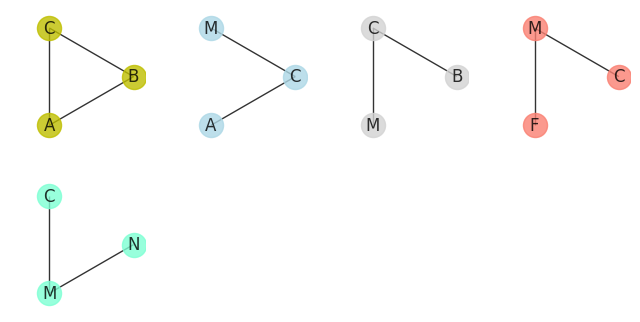

In [34]:
# How many three node graphlets of type 2 are there rooted at vertex C?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 3, 'C'), labels)

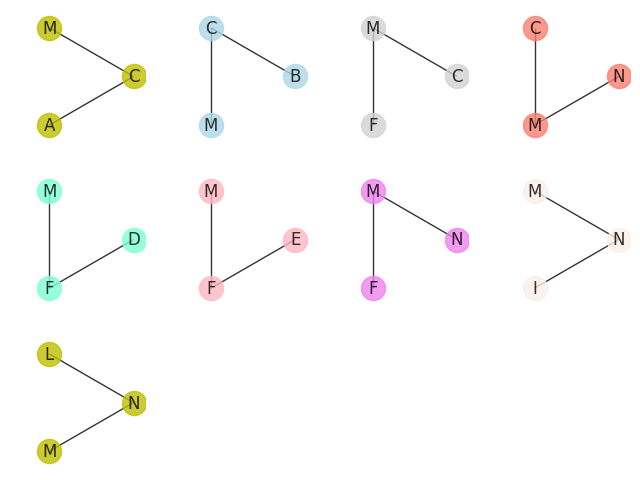

In [35]:
# How many three node graphlets of type 2 are there rooted at vertex M?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 3, 'M'), labels)

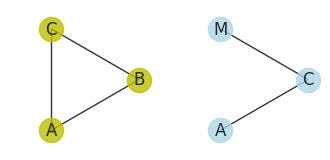

In [36]:
# How many three node graphlets of type 3 are there rooted at vertex A?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 3, 'A'), labels)

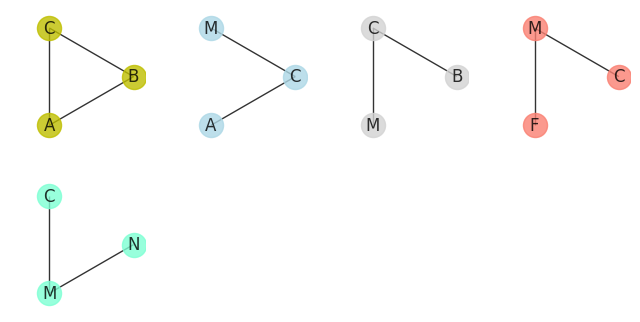

In [37]:
# How many three node graphlets of type 3 are there rooted at vertex C?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 3, 'C'), labels)

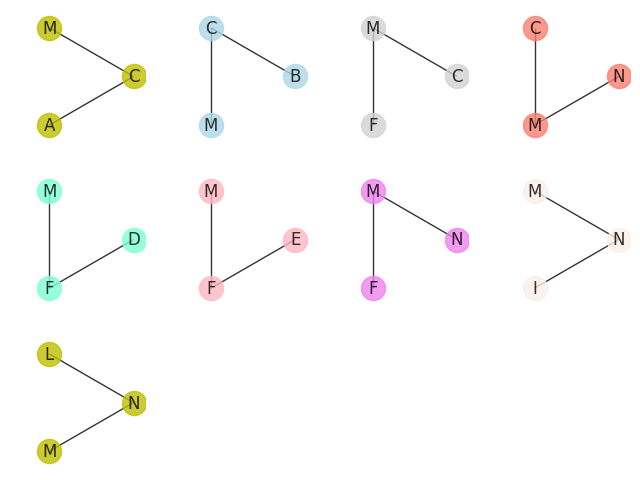

In [38]:
# How many three node graphlets of type 3 are there rooted at vertex M?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 3, 'M'), labels)

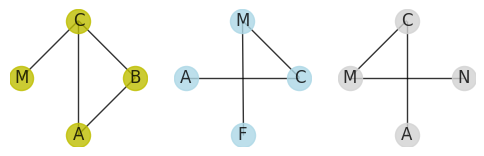

In [39]:
# How many four node graphlets of type 5 are there rooted at vertex A?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 4, 'A'), labels)

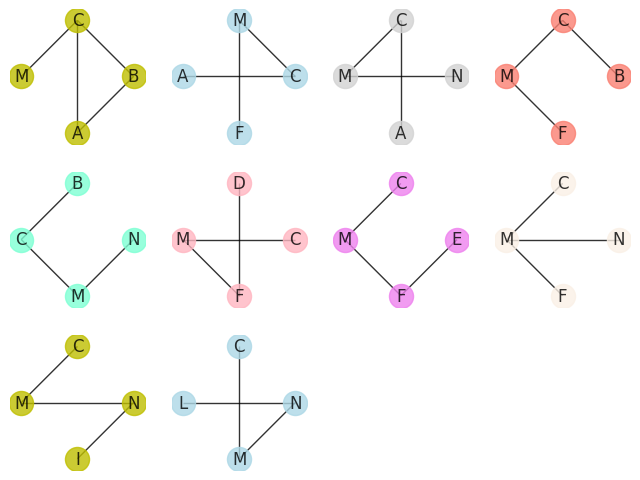

In [40]:
# How many four node graphlets of type 5 are there rooted at vertex C?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 4, 'C'), labels)

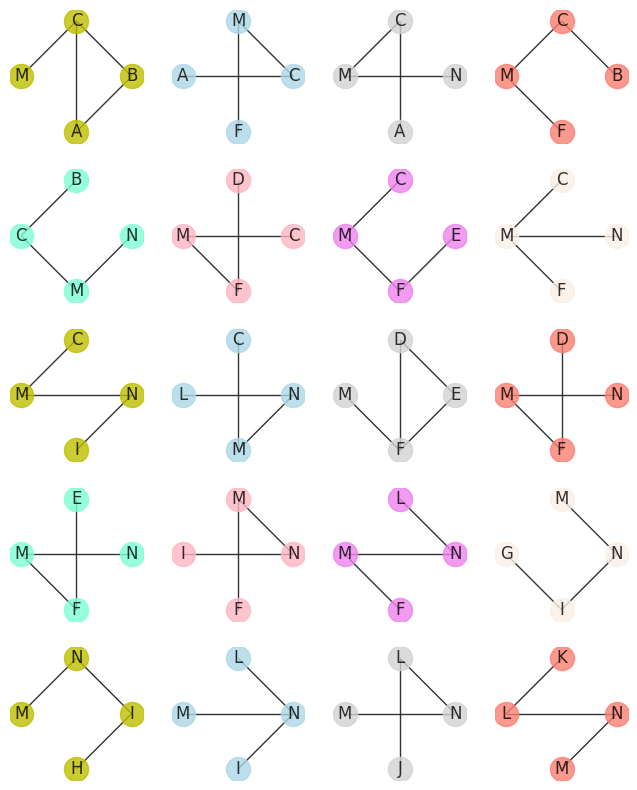

In [41]:
# How many four node graphlets of type 5 are there rooted at vertex M?
show_graphs_in_a_set(find_subgraphs_containing_vertex(G, 4, 'M'), labels)